# Netlets with inhibition

Netlet is a random network model. <br>
The formulas was devised by *Anninos* and colleagues.

**This notebook:**
1. Will calculate the fraction of active nodes in a netlet as a function of the fraction of active nodes in the previous time interval.
2. Will plot the calculations.

## Import libraries

Run the following cell to import the required libraries for this project. <br>
In case you receive a <font color=maroon> **ModuleNotFoundError** </font>, you will first have to install them to your system.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Initialize data and constants

In [2]:
#Initialize constants
'''
h = the fraction of inhibitory nodes relative to excitatory nodes
C_in = Number of inhibitory synapses
C_ex = Number of excitatory synapses
M = a sufficiently large number so that the value of the sum does not change much with the inclusion of higher terms
theta_range = a range of thetas where:
theta = the number of presynaptic spikes necessary to elicit a postsynaptic spike

'''
h = 0
C_in = 10
C_ex = 10
M = 20
theta_range = range(1,7)

#Initializing arrays
'''
a_arr = is a copy of a0, created just to run the loop over its values.
a0 = fraction of active neurons at time t
a1 = fraction of active neurons at time t+1
cache = stores the intermediate a1 values, within the for loop running over theta_range
'''
a_arr = np.arange(0, 1, 0.01, dtype= "float16").round(decimals = 2)
a0 = a_arr 
a1 = np.zeros((a_arr.shape), dtype = "float16")
cache = []

## Equation
The formula to a netlet with inhibitory neurons is given by:

$$
<a_{t+1}> \quad = \quad (1-a_{t})e^{-(a_{t}hC_{in})}
\displaystyle\sum_{n=0}^{M} \frac{(a_{t}hC_{in})^{n}}{n!}
\left(1-e^{-a_{t}(1-h)C_{ex}}
\displaystyle\sum_{n=1}^{\Theta-1}\frac{(a_{t}(1-h)C_{ex})^{n}}{n!}
\right)
$$ 

In [3]:
#calculate fraction of active nodes for different thetas
for theta in theta_range:
    #looping through the loop of fraction of active nodes in previous time interval
    for index, a in enumerate(a_arr):
        s1 = 0
        s2 = 0
        tmp1 = (1-h)*a*C_ex
        tmp2 = h*a*C_in
        s1 = np.sum(
            list(
                map(
                    lambda n: np.power(tmp1, n)/np.math.factorial(n), range(theta)
                )
            )
        )
        s2 = np.sum(
            list(
                map(
                    lambda n: np.power(tmp2, n)/np.math.factorial(n), range(M)
                )
            )
        )
        a1[index] = (1-a)*np.exp(-tmp2)*s2 *(1-np.exp(-tmp1))*s1
    a1_temp = np.copy(a1)
    cache.append(a1_temp)
            

## Plots

Text(0, 0.5, 'Fraction of active neurnos at t+1')

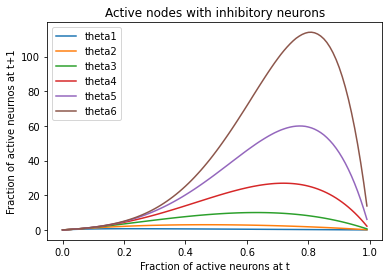

In [4]:
%matplotlib inline
for i in range(len(cache)):
    plt.plot(a0, cache[i], label=f"theta{i+1}")

plt.legend()
plt.title("Active nodes with inhibitory neurons")
plt.xlabel("Fraction of active neurons at t")
plt.ylabel("Fraction of active neurnos at t+1")

## References:
1.Latex Cheat Sheet: [latex cheat sheet](https://en.wikibooks.org/wiki/LaTeX/Mathematics)

In [8]:
for i in range(theta_range)

range(1, 7)